In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['seaborn-white'])

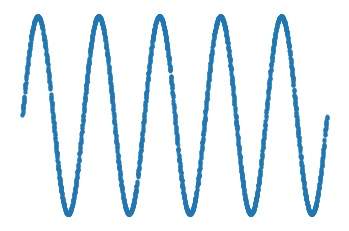

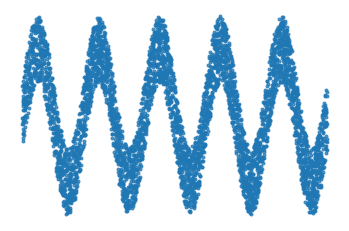

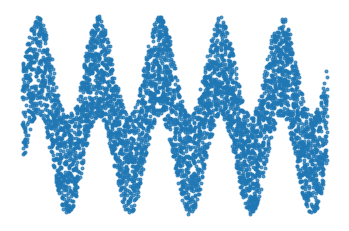

In [3]:
x = 10*np.pi*np.random.rand(5000)
def getY(x, k=0):
    return np.sin(x)+k*(2*np.random.rand(len(x))-1)

y = getY(x)
ks = [0,  0.5, 1]
i = 0
for k in ks: 
    y = getY(x, k) 
    plt.figure()
    plt.plot(x, y, '.', alpha=0.75)
    plt.axis('off')
    plt.savefig("../presentations/images/sine_with_noise{}.svg".format(i))
    i += 1
plt.show()

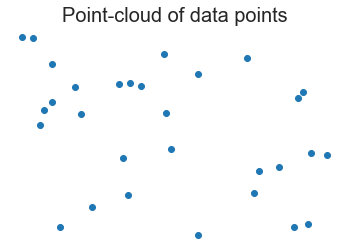

In [4]:
#random data
x = np.random.rand(30)
y = np.random.rand(30)
plt.scatter(x, y) 
plt.title('Point-cloud of data points', fontsize=20)
plt.axis('off')
plt.savefig("../presentations/images/point-cloud.svg", transparent=True)
plt.show()

In [11]:
points = np.array([[x[i], y[i]] for i in range(len(x))])

(30,)


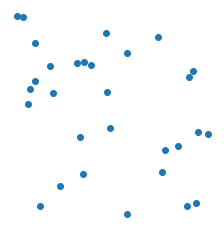

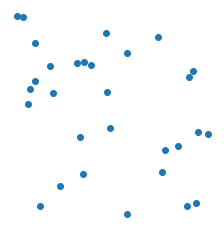

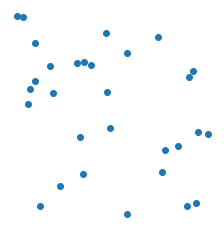

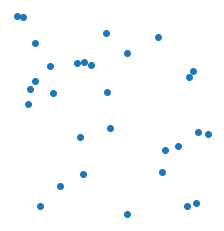

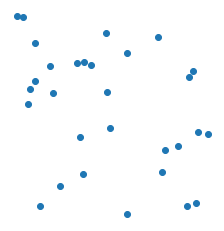

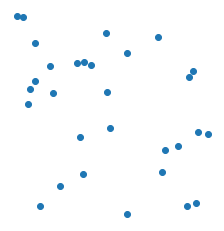

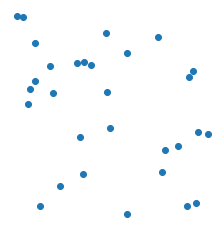

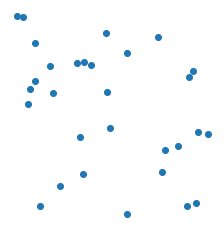

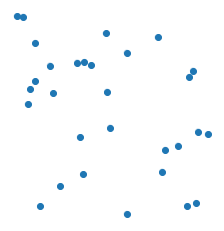

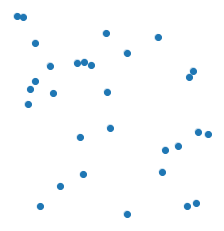

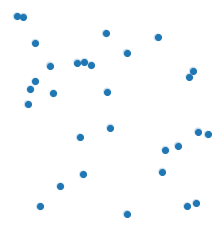

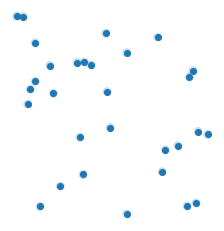

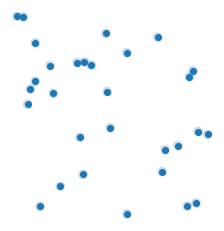

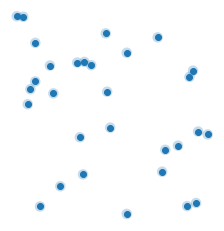

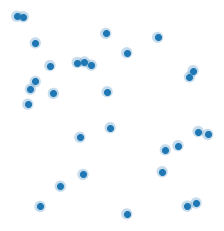

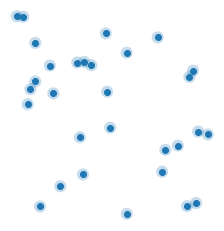

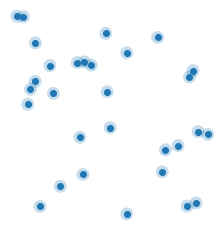

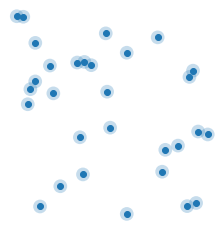

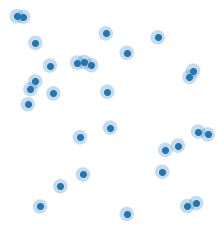

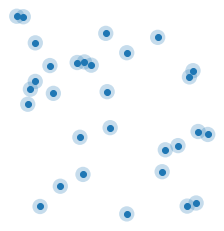

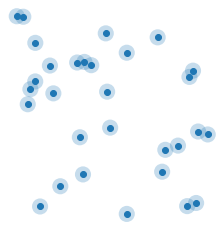

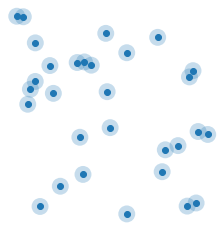

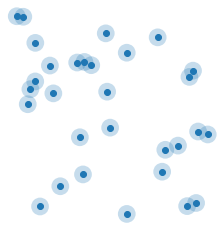

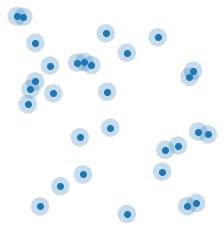

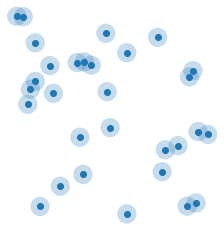

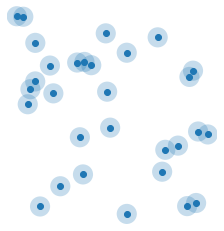

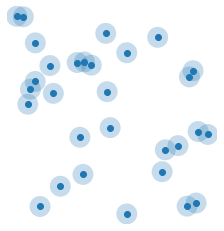

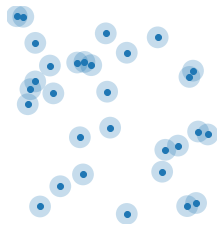

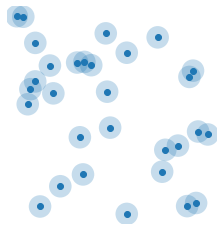

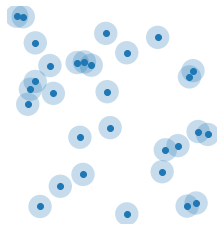

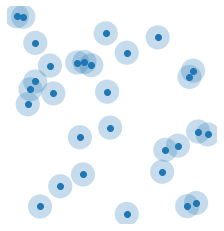

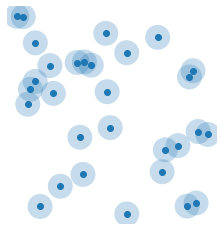

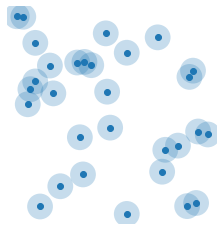

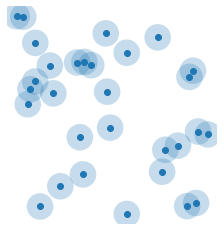

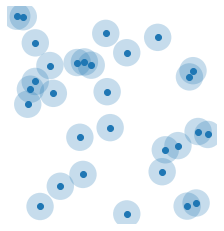

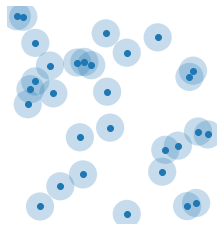

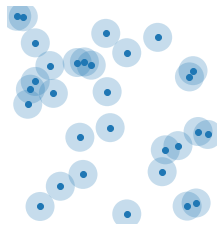

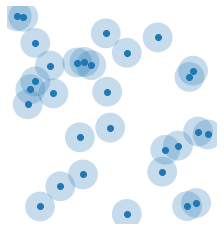

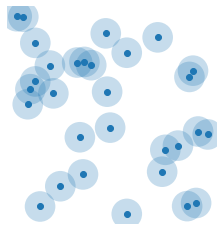

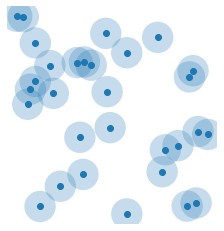

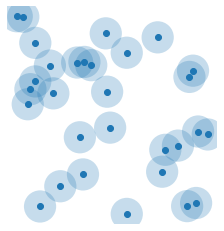

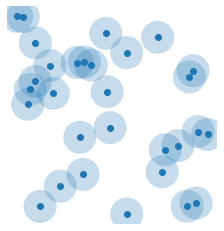

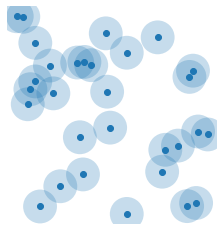

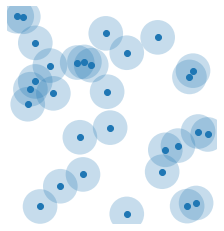

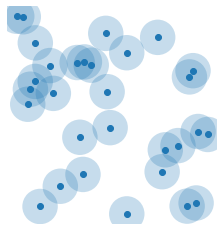

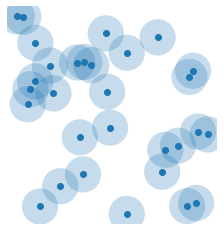

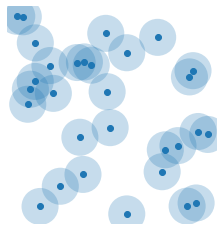

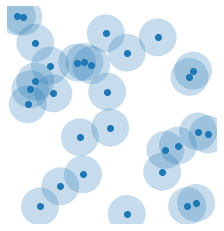

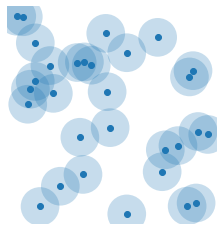

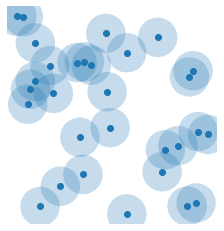

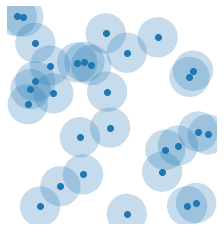

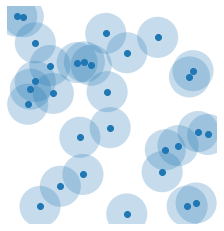

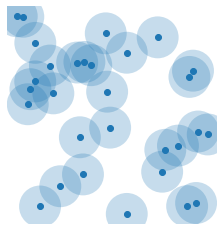

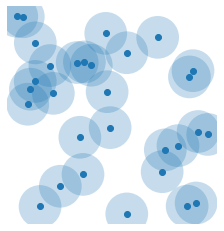

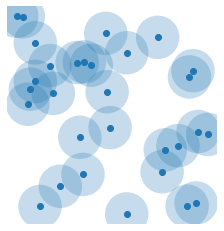

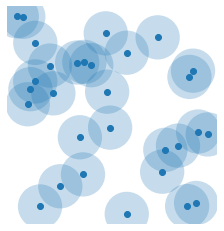

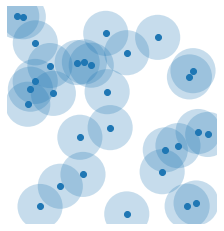

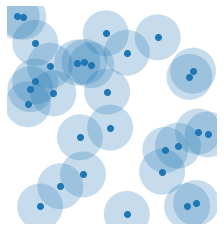

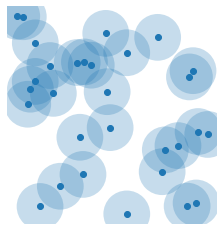

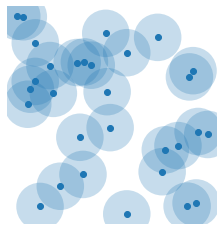

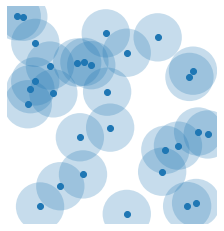

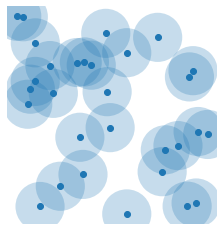

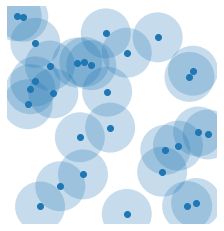

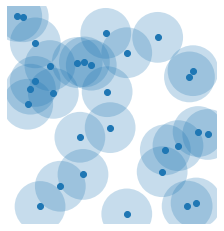

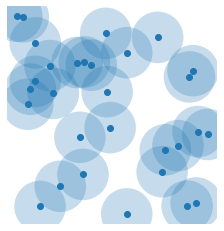

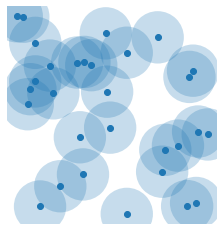

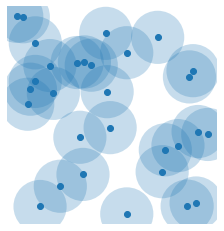

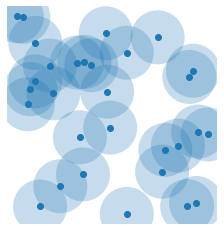

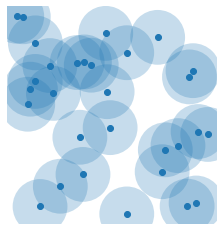

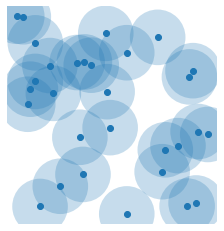

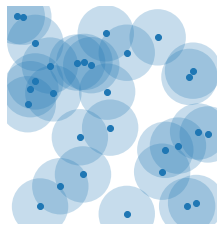

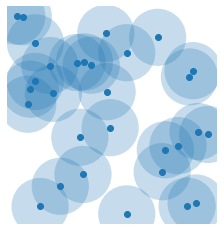

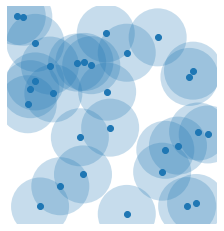

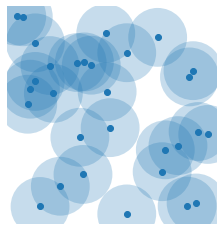

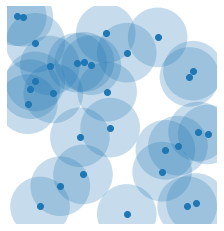

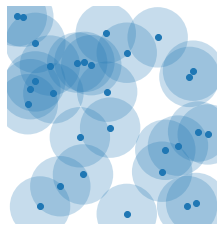

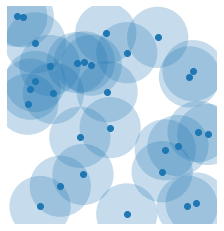

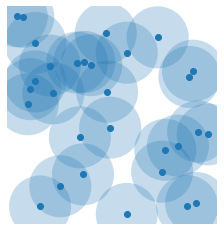

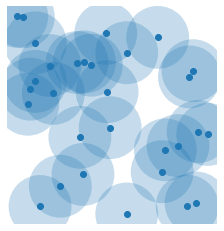

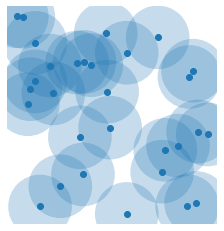

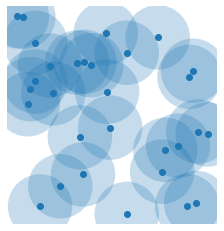

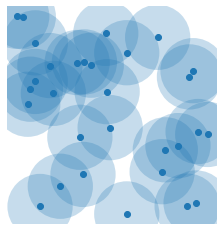

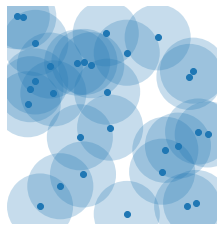

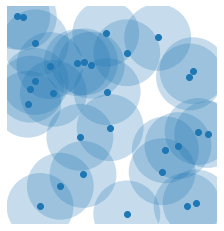

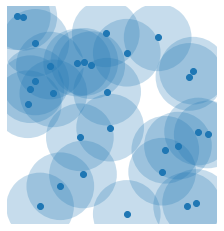

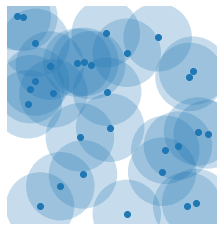

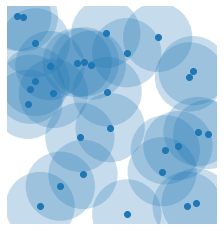

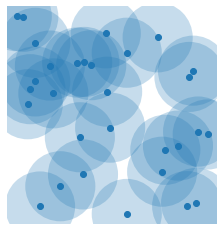

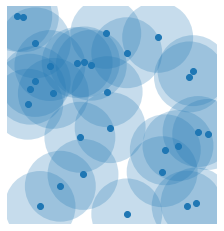

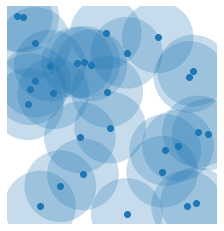

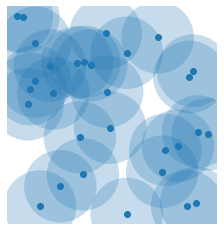

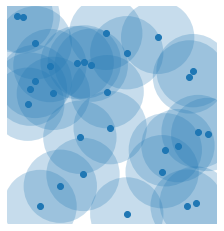

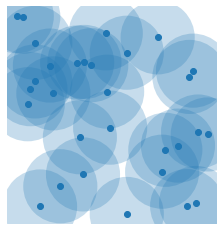

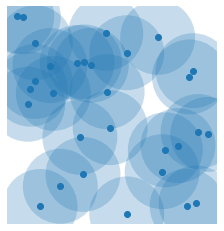

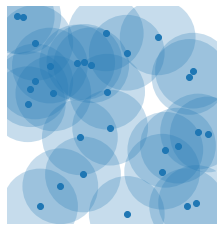

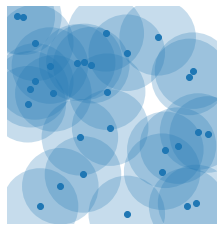

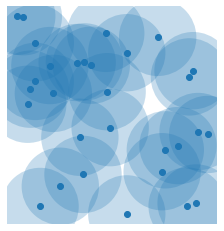

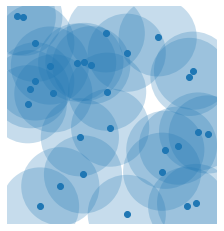

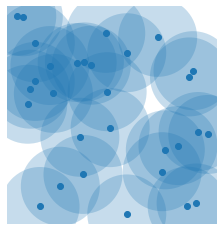

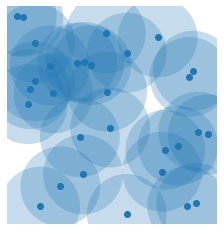

In [19]:
rs = np.linspace(0, .2, 100) 
for r in rs:
    plt.figure()
    ax = plt.gca() 
    plt.scatter(points[:,0], points[:,1])
    for i in range(points.shape[0]):
        circle = plt.Circle((points[i,0], points[i,1]), r, 'b', alpha=0.25)
        ax.add_artist(circle)
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()


In [60]:
# let's try and be more clever about this 

circs = [Circle(x[i], y[i]) for i in range(len(x))]


class PointCloud: 
    def __init__(self, xs, ys, R=0):
        self.centers = np.array([[xs[i], ys[i]] for i in range(len(xs))]) 
        self.lines = [] 
        self.R = R
        self.n = self.centers.shape[0]
    
    def updateLines(self): 
        for i in range(self.n): 
            for j in range(i, self.n): 
                d2 = (self.centers[i, 0]-self.centers[j,0])**2 + (self.centers[i,1] - self.centers[j,1])**2 
                if d2 <= (2*self.R)**2: 
                    self.lines.append([self.centers[i,:],self.centers[j,:]])
        
    def plotCircs(self): 
        for i in range(self.n): 
            plt.scatter(self.centers[i,0], self.centers[i,1], color='b') 
            circle = plt.Circle((self.centers[i,0], self.centers[i,1]), self.R, color='b', alpha=0.15)
            ax.add_artist(circle)

    def plotLines(self): 
        for line in self.lines: 
            c1 = line[0]
            c2 = line[1] 
            plt.plot([c1[0], c2[0]], [c1[1], c2[1]], 'k')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


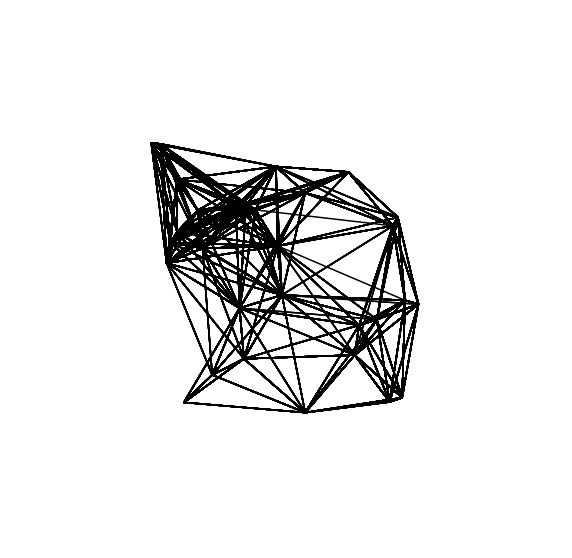

In [64]:
circs = PointCloud(x, y)
            
rs = np.linspace(0, 0.25, 100) 
i = 1 
for r in rs: 
    print(i)
    fig, ax = plt.subplots(figsize=(10,10)) 
    circs.R=r
    circs.updateLines() 
    circs.plotCircs()
    circs.plotLines()
    plt.axis('off')
    ax.set_aspect('equal')
    plt.xlim(-.5, 1.5)
    plt.ylim(-.5, 1.5)
    plt.savefig("../presentations/images/frames/simplicial_complex_{:03d}.png".format(i))
    i+=1 
    plt.close() 

    
plt.figure(figsize=(10,10)) 
circs.plotLines() 
plt.axis('off')
plt.xlim(-.5, 1.5) 
plt.ylim(-.5, 1.5) 
plt.savefig("../presentations/images/generated_simplicial_complex.svg", transparent=True)

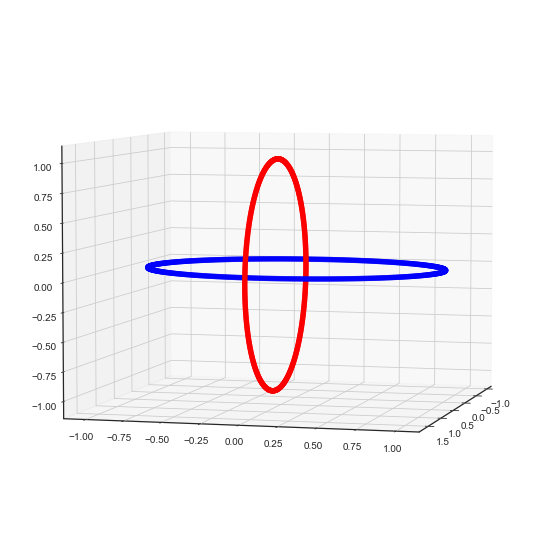

In [174]:
# 3d knot data 
from mpl_toolkits.mplot3d import Axes3D 

theta1 = np.linspace(np.pi/2, 3*np.pi/2, 1000)
theta2 = np.linspace(-np.pi/2, np.pi/2, 1000)

x1 = np.cos(theta1)
y1 = np.sin(theta1)

x2 = np.cos(theta2) 
y2 = np.sin(theta2) 

circle1_front = np.array([x1, y1, np.zeros(len(x1))]).T
circle1_back = np.array([x2, y2, np.zeros(len(x1))]).T

circle2_front = np.array([x1+.65, np.zeros(len(x1)), y1]).T
circle2_back = np.array([x2+.65, np.zeros(len(x1)), y2]).T


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(circle1_front[:,0], circle1_front[:,1], circle1_front[:,2], color='b', alpha=0.25)

ax.scatter(circle1_back[:,0], circle1_back[:,1], circle1_back[:,2], color='b', alpha=0.25)
ax.scatter(circle2_front[:,0], circle2_front[:,1], circle2_front[:,2], color='r', alpha=0.25)

ax.scatter(circle2_back[:,0], circle2_back[:,1], circle2_back[:,2], color='r', alpha=0.25)


ax.view_init(elev=5, azim=15)
plt.savefig('../presentations/images/knot.svg')
#plt.axis('off')
plt.show()
